## Example Usage

Here we will demonstrate how to use `wordviz`
 to generate some word embedding visualizations, in both static and interactive version.

### Imports

In [31]:
from wordviz.loading import EmbeddingLoader
from wordviz.plotting import Visualizer

### Pretrained embedding loading

Through the `EmbeddingLoader` you can load your embeddings from a local file, but also use one of the available one, which will be downloaded by the package. 

In [32]:
loader = EmbeddingLoader()
loader.list_available_pretrained()

model | lang | source | dim
glove | en | wiki | 100d
glove | en | cc | 300d
glove | en | twitter | 100d
fasttext | it | cc | 300d


In [33]:
loader.load_pretrained('glove', 'en', 'wiki', '100d')

glove.6B.zip already exists in cache.
Embedding loaded from file


array([[-0.038194, -0.24487 ,  0.72812 , ..., -0.1459  ,  0.8278  ,
         0.27062 ],
       [-0.10767 ,  0.11053 ,  0.59812 , ..., -0.83155 ,  0.45293 ,
         0.082577],
       [-0.33979 ,  0.20941 ,  0.46348 , ..., -0.23394 ,  0.47298 ,
        -0.028803],
       ...,
       [ 0.36088 , -0.16919 , -0.32704 , ...,  0.27139 , -0.29188 ,
         0.16109 ],
       [-0.10461 , -0.5047  , -0.49331 , ...,  0.42527 , -0.5125  ,
        -0.17054 ],
       [ 0.28365 , -0.6263  , -0.44351 , ...,  0.43678 , -0.82607 ,
        -0.15701 ]], dtype=float32)

We can access to vectors and tokens through the loader object properties.

In [42]:
import wordviz.plotting
import wordviz.similarity
import importlib
importlib.reload(wordviz.plotting)
importlib.reload(wordviz.similarity)

vis = wordviz.plotting.Visualizer(loader)

In [34]:
vectors = loader.embeddings
words = loader.tokens
vectors.shape

(400000, 100)

### Visualizing

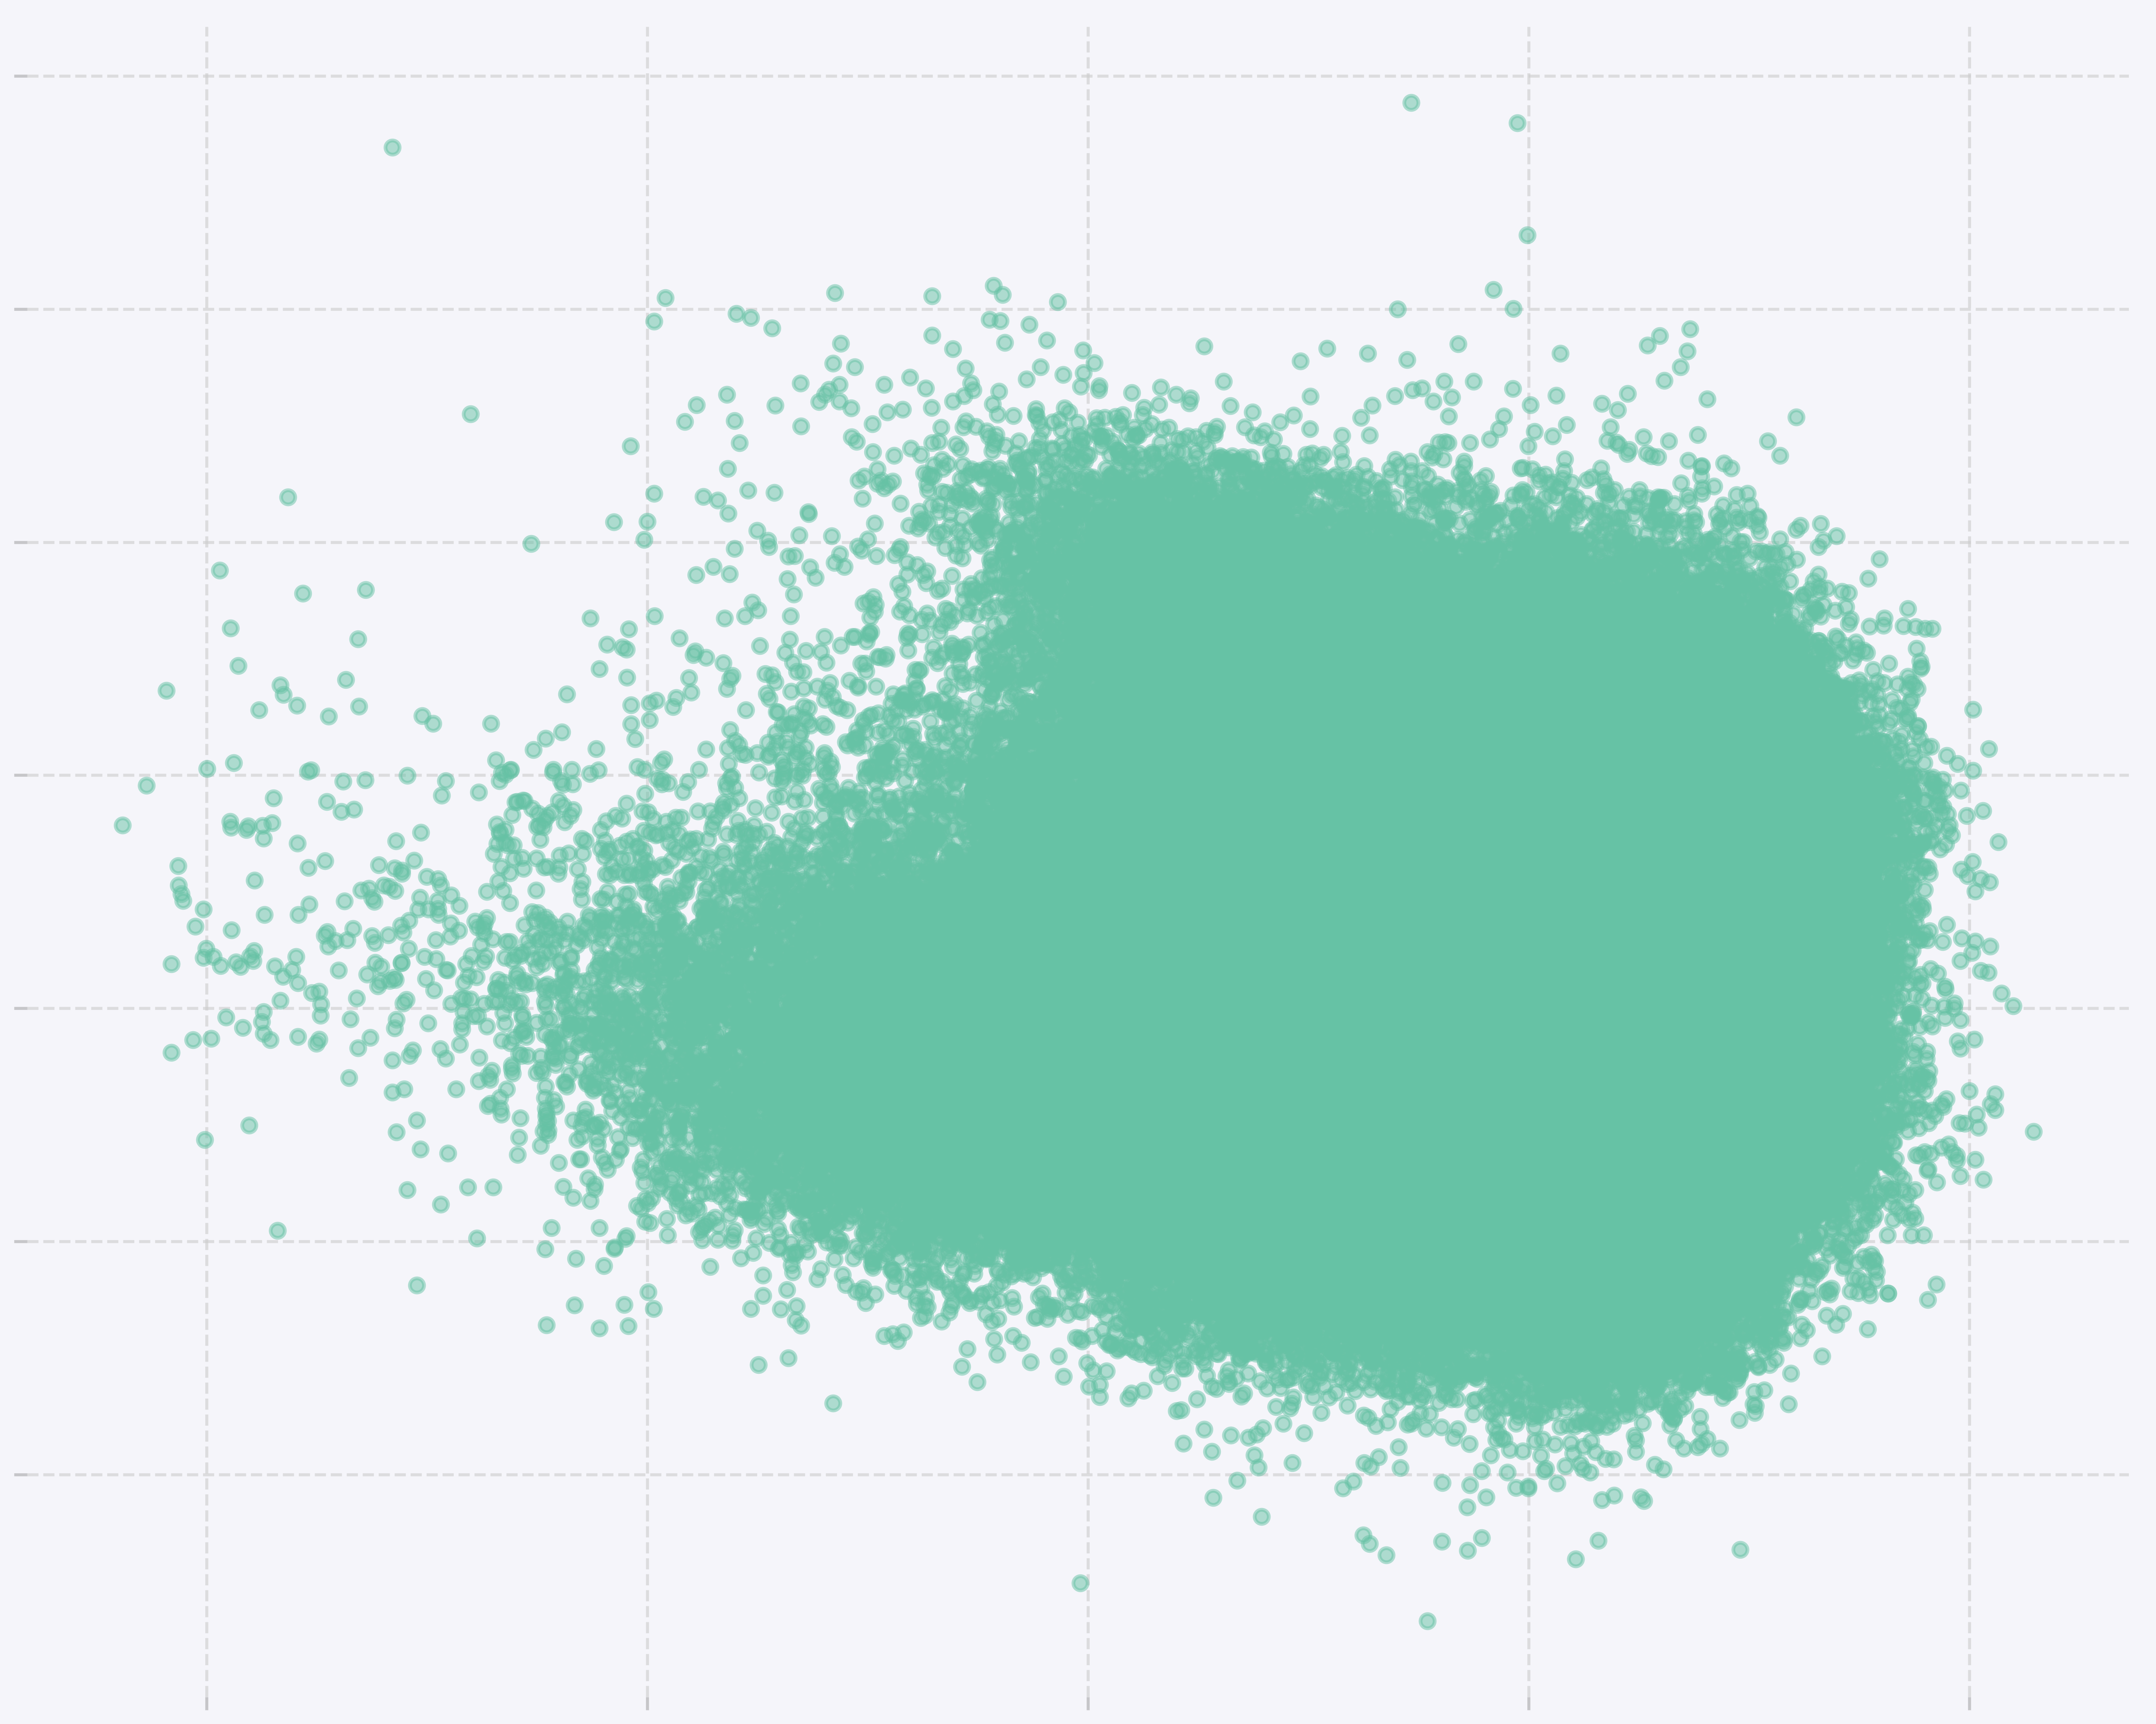

(<Figure size 6000x4800 with 1 Axes>, <Axes: >)

In [35]:
vis = Visualizer(loader)
vis.plot_embeddings()

This was the very basic and static embedding visualization.  
In the package there are various other possibilities, for example plotting similar words. There are also many attributes to customize appearance, vector subsetting, and pre-visualization operations. The following are some plot examples:

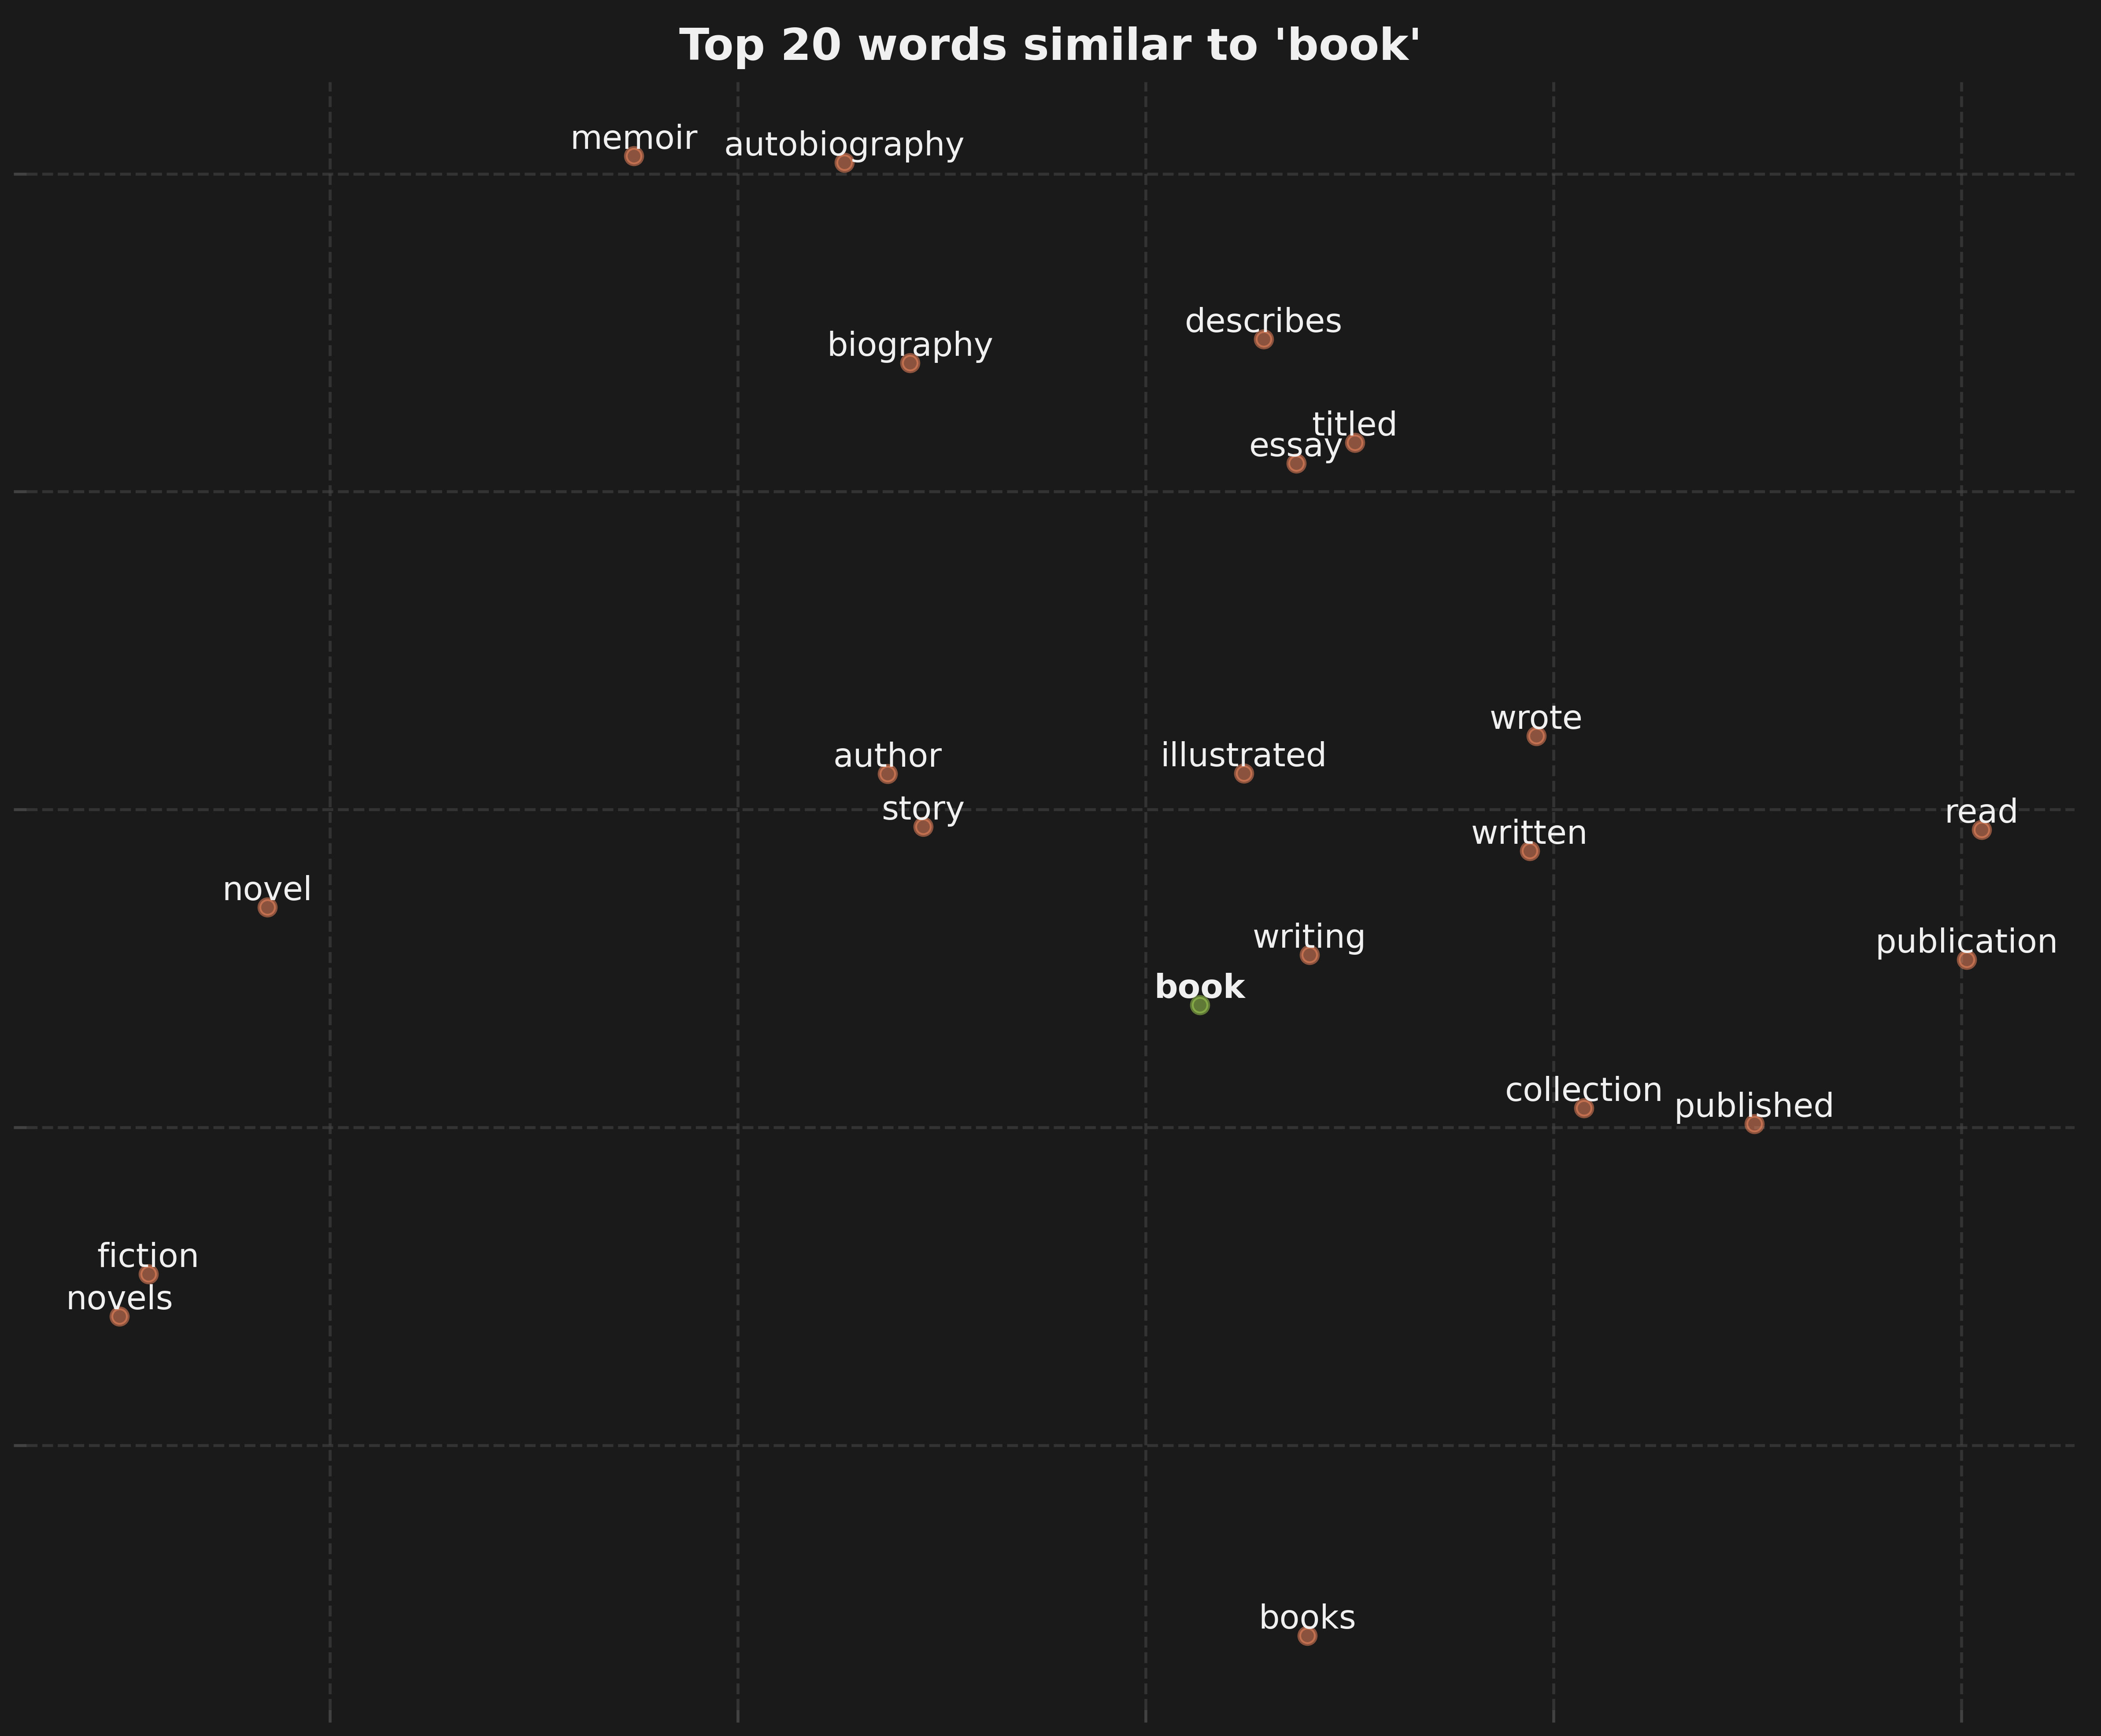

(<Figure size 6000x4800 with 1 Axes>,
 <Axes: title={'center': "Top 20 words similar to 'book'"}>)

In [44]:
vis.plot_similarity('book', dist='euclidean', n=20, red_method='pca', theme='dark1')

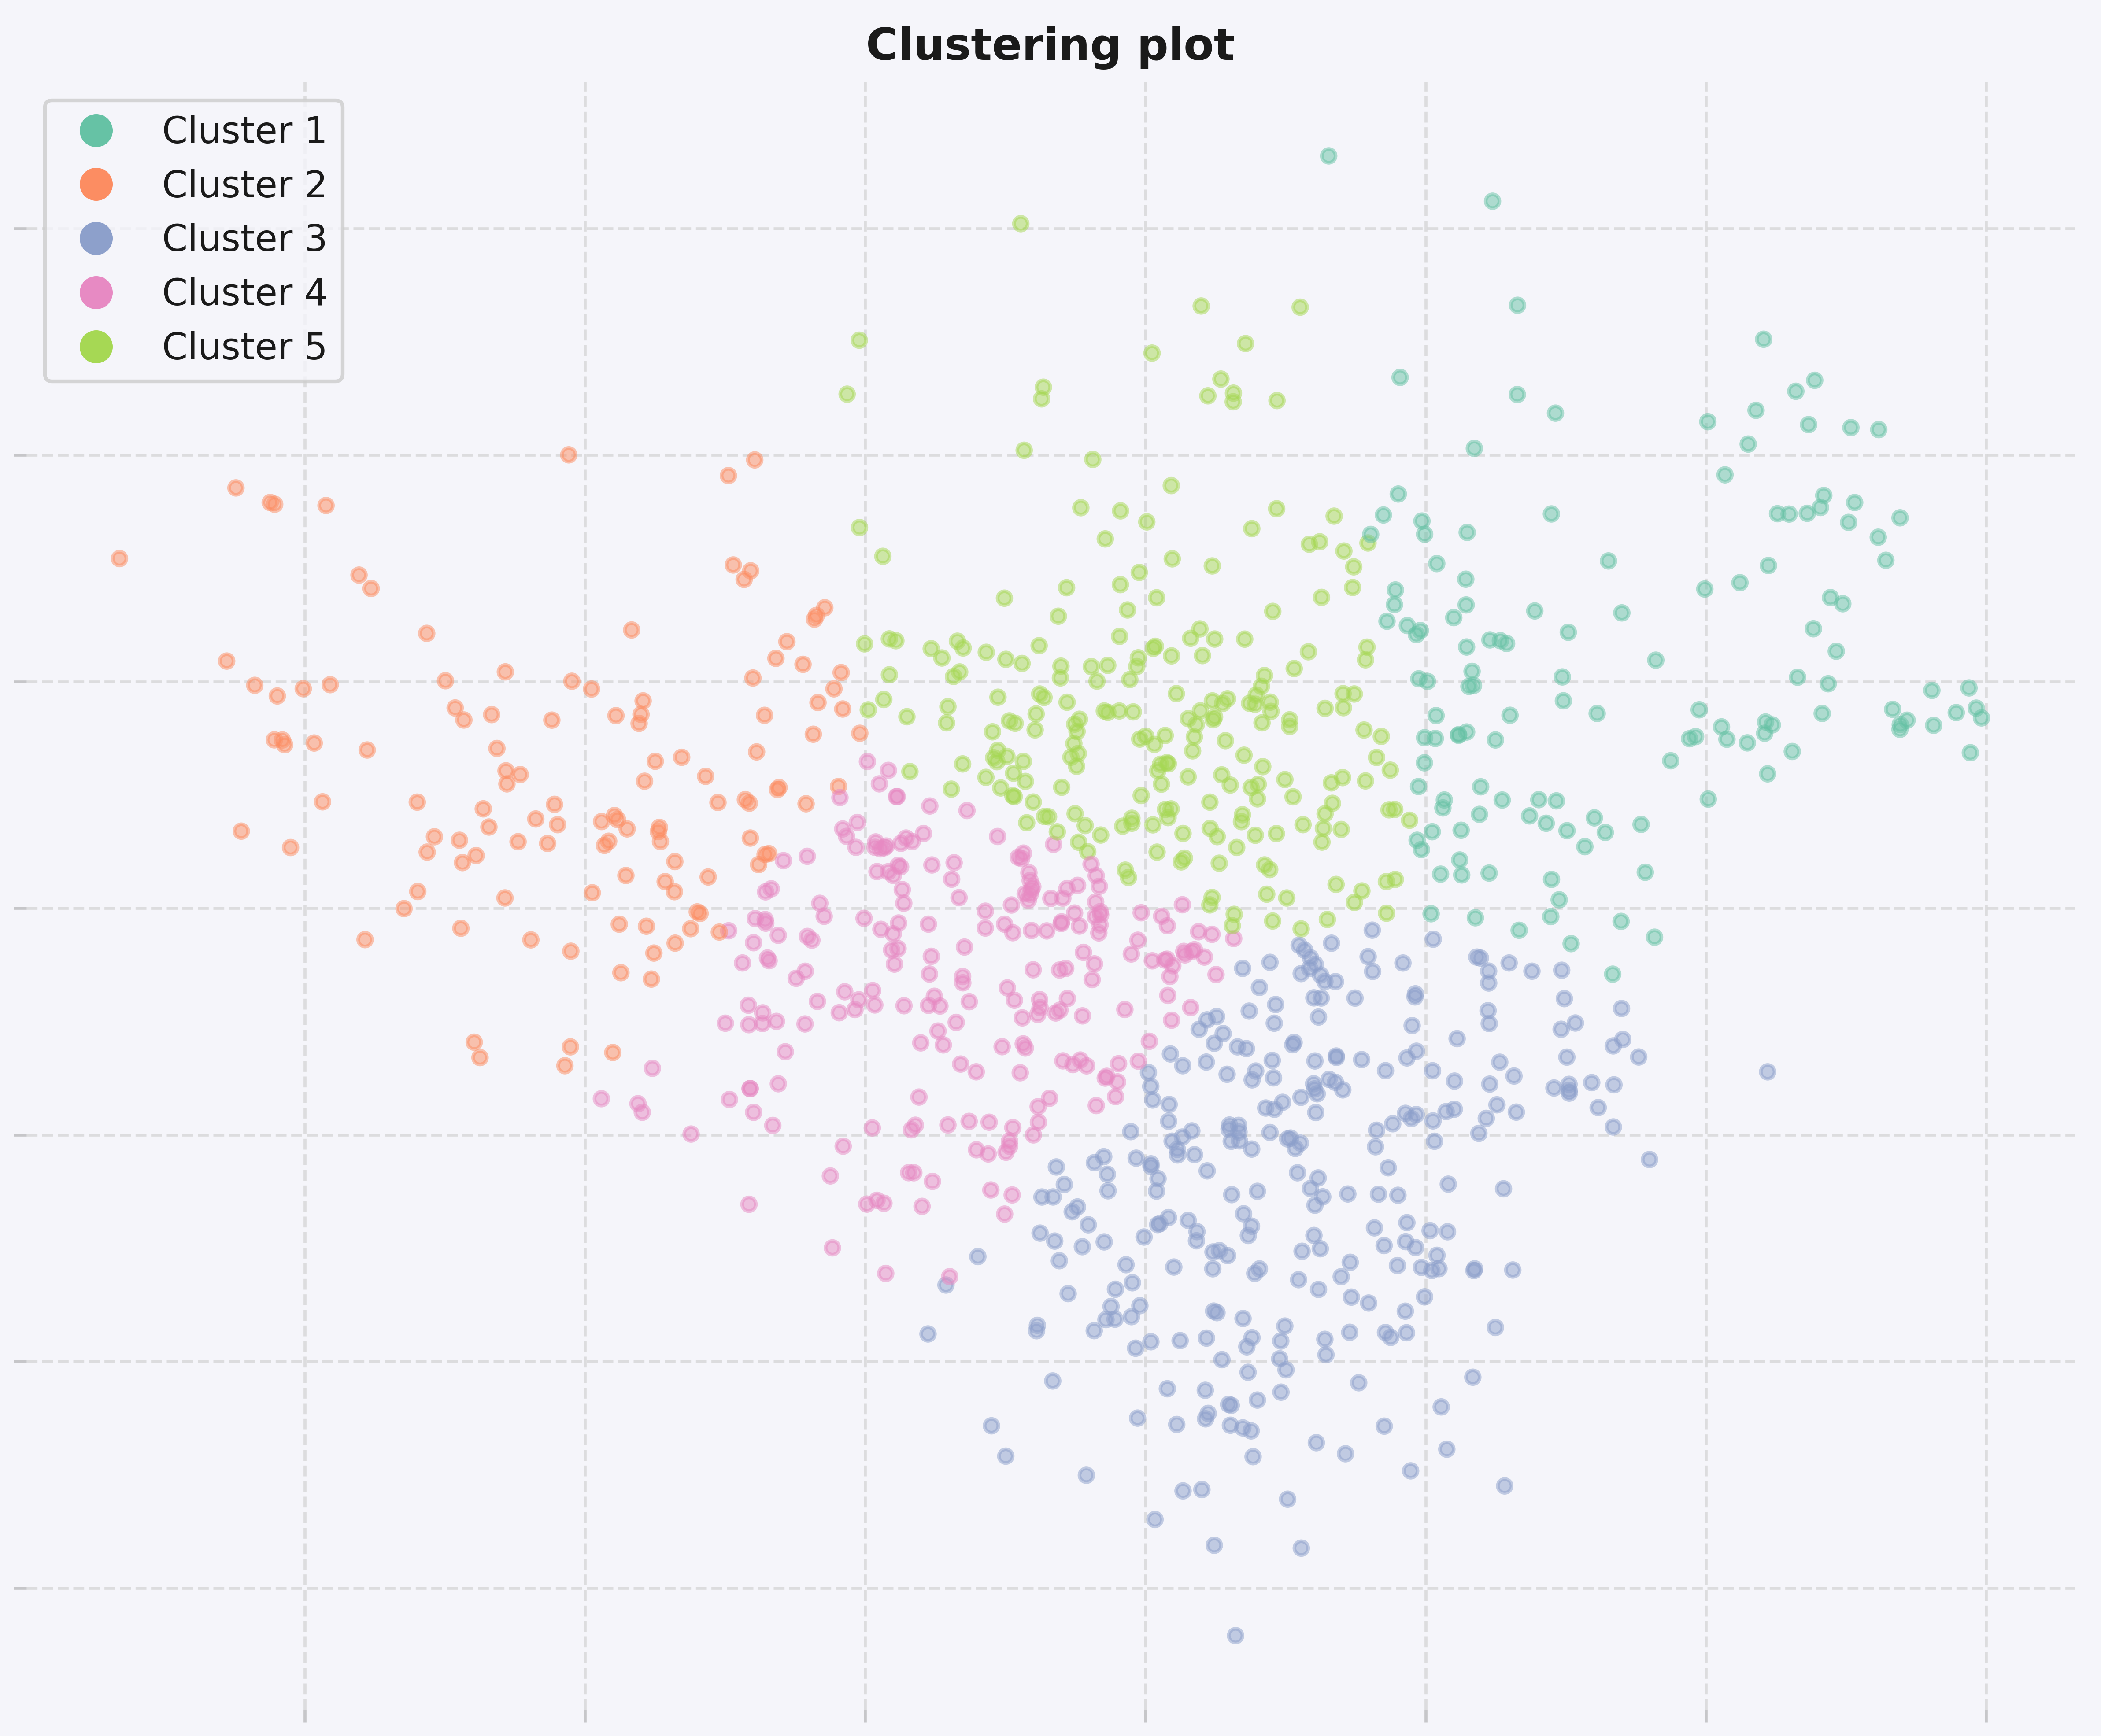

(<Figure size 6000x4800 with 1 Axes>,
 <Axes: title={'center': 'Clustering plot'}>)

In [9]:
vis.plot_clusters(method='kmeans', show_centers=False, title='Clustering plot', use_subset=True)

### Other available features

It is also possible to use separately some functions made for visualization from `similarity`, `clustering` and `dim_reduction` modules.

In [ ]:
from wordviz.clustering import create_clusters
from wordviz.dim_reduction import reduce_dim
from wordviz.similarity import word_distance

In [ ]:
reduced = reduce_dim(vectors)

In [ ]:
word_distance(loader, 'cat', 'dog', dist='cosine')

In [ ]:
create_clusters(vectors, n_clusters=20, method='kmeans')

#### Subsetting

Many of the plotting functions allow to automatically use a subset of the embeddings through the property `use_subset`. This saves the subset in the `embedding_subset` property of the loader object. However, it is also possible for the user to manually update this property.

In [ ]:
loader.subset(500, strategy='random', random_seed=42)